#### 1. Importing Necessary Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [56]:
df=pd.read_csv(r"C:\Users\harit\Documents\data_science\project\Eda\sales_data_sample.csv",encoding="latin")

### 2.Data Interpretation & Cleaning

In [57]:
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


2.1 Handling the Missing Data

In [58]:
df.shape

(2823, 25)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [60]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


 2.2 Data Cleaning

remove null values

In [61]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

remove unnecessary columns


In [62]:
columns_to_drop=['ADDRESSLINE2','STATE','TERRITORY','ADDRESSLINE1','PHONE','CONTACTLASTNAME','CONTACTFIRSTNAME','POSTALCODE']
df=df.drop(columns=columns_to_drop)

In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   QTR_ID           2823 non-null   int64  
 8   MONTH_ID         2823 non-null   int64  
 9   YEAR_ID          2823 non-null   int64  
 10  PRODUCTLINE      2823 non-null   object 
 11  MSRP             2823 non-null   int64  
 12  PRODUCTCODE      2823 non-null   object 
 13  CUSTOMERNAME     2823 non-null   object 
 14  CITY             2823 non-null   object 
 15  COUNTRY          2823 non-null   object 
 16  DEALSIZE         2823 non-null   object 
dtypes: float64(2),

In [64]:
df.isna().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
CITY               0
COUNTRY            0
DEALSIZE           0
dtype: int64

2.3 Outlier Detection

In [65]:
df.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
CUSTOMERNAME        object
CITY                object
COUNTRY             object
DEALSIZE            object
dtype: object

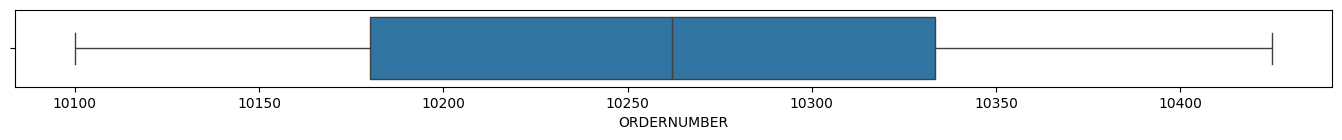

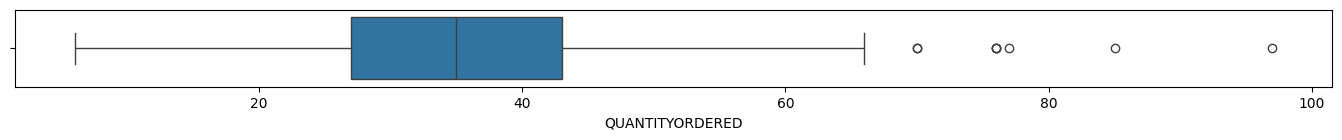

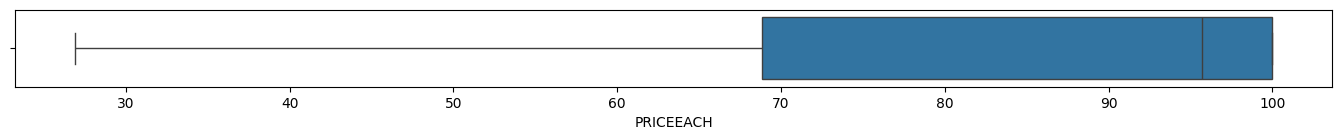

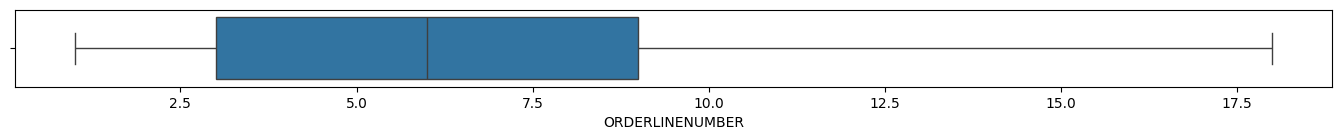

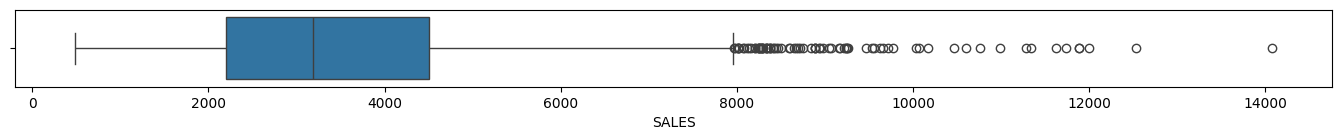

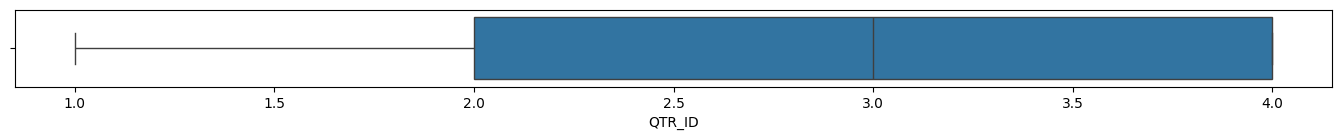

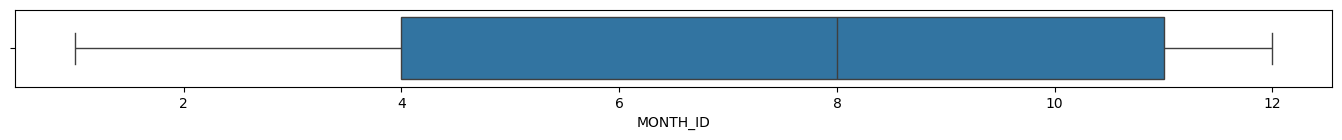

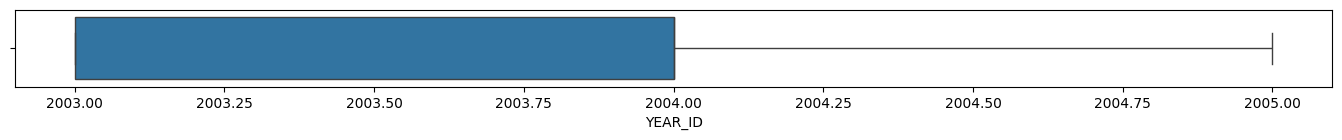

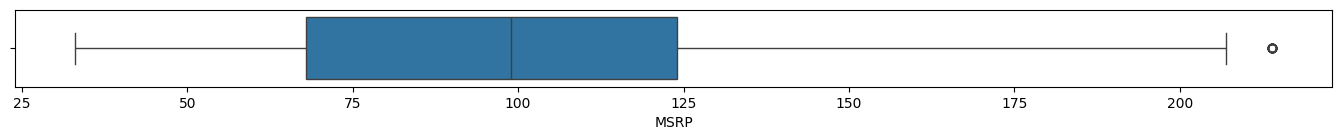

In [66]:
df1=df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

Since Outliers exist only for columns such as MSRP, Sales and Qty Ordered which can fluctuate based on demand and area, we confirm that we didnt find any data anomaly.

In [67]:
df = df.sort_values(by='SALES', ascending=False)

In [68]:
df['SALES'].head(80)

598     14082.80
744     12536.50
53      12001.00
1062    11887.80
104     11886.60
          ...   
189      8023.29
41       8014.82
32       8014.82
163      8008.56
203      7975.44
Name: SALES, Length: 80, dtype: float64

In [69]:
count,sum=0,0
for i in df['SALES']:
    if i<8000:
        sum+=i
        count+=1
mean_sales=sum/count

df.loc[(df['SALES'] >= 7000) & (df['SALES'] < 14083), 'SALES'] = mean_sales
print(df['SALES'])




598     3391.26289
744     3391.26289
53      3391.26289
1062    3391.26289
104     3391.26289
           ...    
1818     640.05000
1551     577.60000
2044     553.95000
1287     541.14000
2249     482.13000
Name: SALES, Length: 2823, dtype: float64


In [70]:
df.loc[(df['QUANTITYORDERED'] >=70) & (df['QUANTITYORDERED'] < 100), 'QUANTITYORDERED']=np.nan
df['QUANTITYORDERED'].dropna(inplace=True)





In [71]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'COUNTRY',
       'DEALSIZE'],
      dtype='object')

In [72]:
df=df.sort_values(by='MSRP',ascending=False)

In [73]:
df['MSRP'].head(50)

52     214
35     214
33     214
45     214
36     214
38     214
50     214
40     214
41     214
32     214
46     214
39     214
49     214
37     214
29     214
51     214
28     214
34     214
27     214
42     214
47     214
26     214
31     214
43     214
53     214
48     214
30     214
44     214
197    207
191    207
206    207
189    207
209    207
201    207
208    207
187    207
188    207
190    207
199    207
202    207
204    207
195    207
200    207
211    207
196    207
207    207
210    207
198    207
186    207
205    207
Name: MSRP, dtype: int64

In [74]:
df.loc[(df['MSRP']>=207),'MSRP']=np.nan
df['MSRP'].dropna(inplace=True)

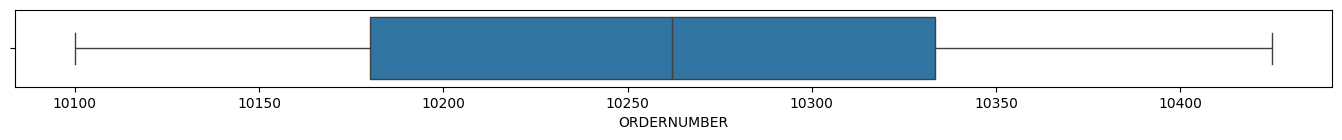

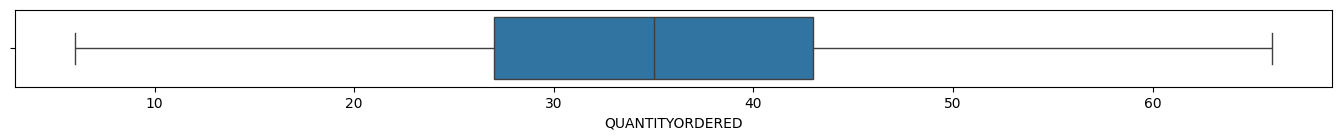

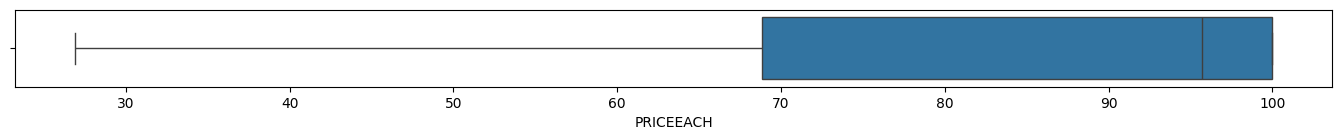

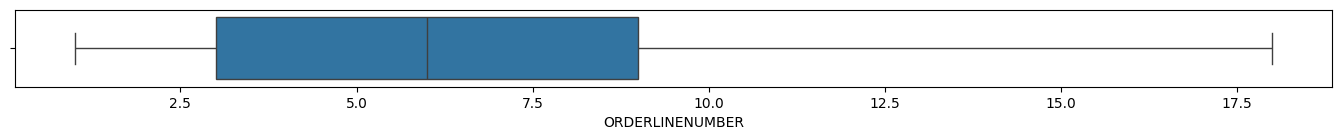

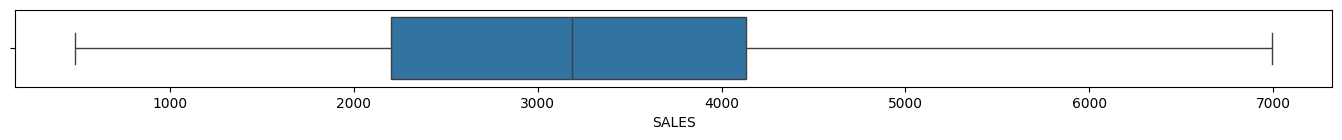

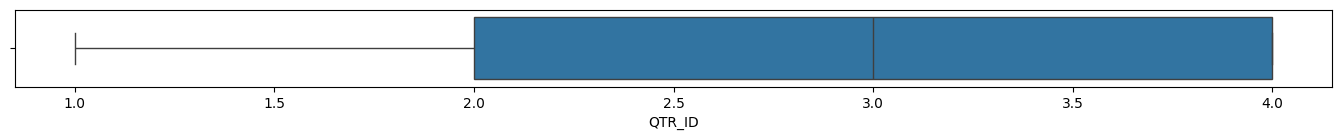

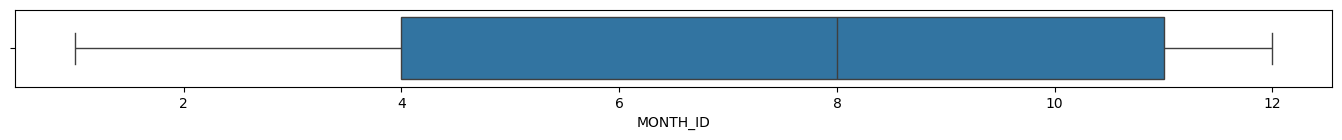

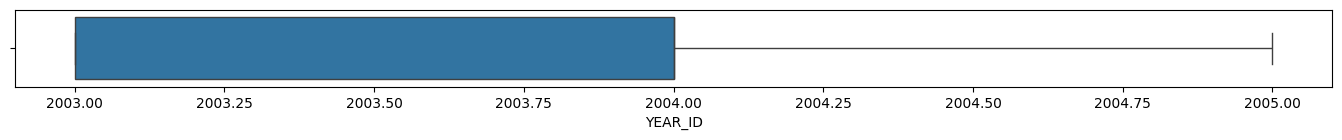

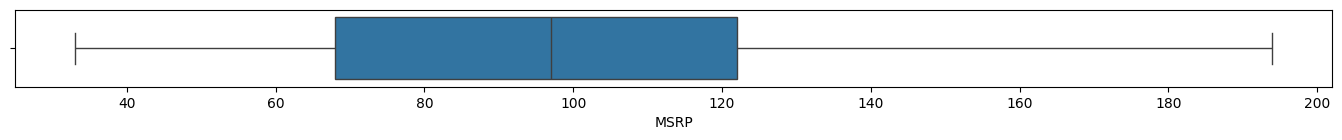

In [75]:
df1=df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

In [76]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'COUNTRY',
       'DEALSIZE'],
      dtype='object')

In [77]:
df_correlation=df.select_dtypes(include=[int,float])

In [78]:
df_correlation.corr()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERNUMBER,1.000000,0.046819,-0.002935,-0.055550,0.013539,-0.051383,-0.039723,0.904596,-0.011108
QUANTITYORDERED,0.046819,1.000000,-0.001947,-0.019193,0.477192,-0.028653,-0.029973,0.049811,0.008844
PRICEEACH,-0.002935,-0.001947,1.000000,-0.020965,0.706299,0.008712,0.005152,-0.005938,0.691798
ORDERLINENUMBER,-0.055550,-0.019193,-0.020965,1.000000,-0.024794,0.040716,0.034016,-0.057367,-0.020180
SALES,0.013539,0.477192,0.706299,-0.024794,1.000000,0.006717,0.006150,0.007604,0.576122
QTR_ID,-0.051383,-0.028653,0.008712,0.040716,0.006717,1.000000,0.979300,-0.433052,0.011847
MONTH_ID,-0.039723,-0.029973,0.005152,0.034016,0.006150,0.979300,1.000000,-0.430163,0.008901
YEAR_ID,0.904596,0.049811,-0.005938,-0.057367,0.007604,-0.433052,-0.430163,1.000000,-0.015629
MSRP,-0.011108,0.008844,0.691798,-0.020180,0.576122,0.011847,0.008901,-0.015629,1.000000


<Axes: >

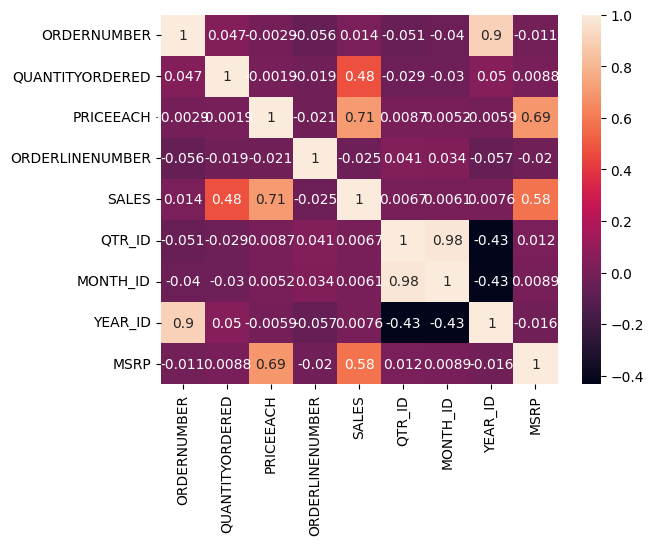

In [79]:

sns.heatmap(df_correlation.corr(),annot=True)


 maximum sales by grouping country by finding the maximum value in sales

In [80]:
max_sales_by_country = df.groupby('COUNTRY')['SALES'].max()
max_sale_value = max_sales_by_country.max()
max_sale_country = max_sales_by_country.idxmax()
print(f"Country with maximum sales {max_sale_country} sales value {max_sale_value}")

Country with maximum sales Spain sales value 6996.42


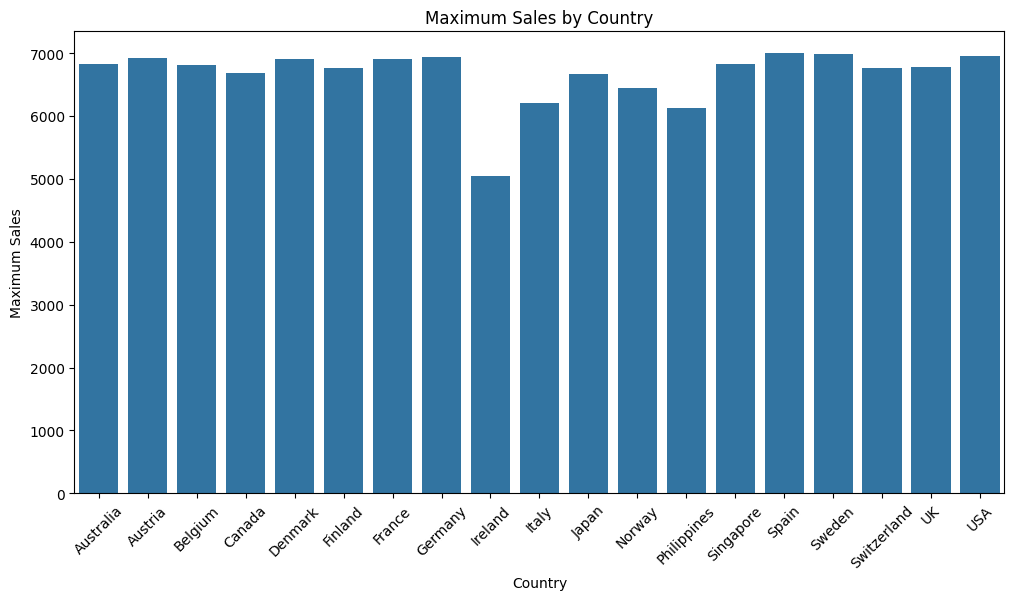

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x=max_sales_by_country.index, y=max_sales_by_country.values)
plt.title('Maximum Sales by Country')
plt.xlabel('Country')
plt.ylabel('Maximum Sales')
plt.xticks(rotation=45)  
plt.show()

In [82]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'COUNTRY',
       'DEALSIZE'],
      dtype='object')

finding maximum sales of product and there total sales number


In [83]:
sales_by_productline = df.groupby('PRODUCTLINE')['SALES'].sum()
max_sales_productline = sales_by_productline.idxmax()
max_sales_value = sales_by_productline.max()
print(f"Product with maximum sales {max_sales_productline} and of total sales {max_sales_value} ")

Product with maximum sales Classic Cars and of total sales 3451926.3703243444 


maximum sales by grouping country and year_id sum of them 

In [84]:
sales_by_country_year = df.groupby(['COUNTRY','YEAR_ID'])['SALES'].sum()
max_sales_info = sales_by_country_year.idxmax()  
max_sales_value = sales_by_country_year.max()  
print(f"Country with maximum sales: {max_sales_info[0]}")
print(f"Year with maximum sales: {max_sales_info[1]}")
print(f"Total sales for this country and year: {max_sales_value}")

Country with maximum sales: USA
Year with maximum sales: 2004
Total sales for this country and year: 1564401.0922485425


findig dealsize

DEALSIZE
Large     5.324283e+05
Medium    6.087432e+06
Small     2.643077e+06
Name: SALES, dtype: float64


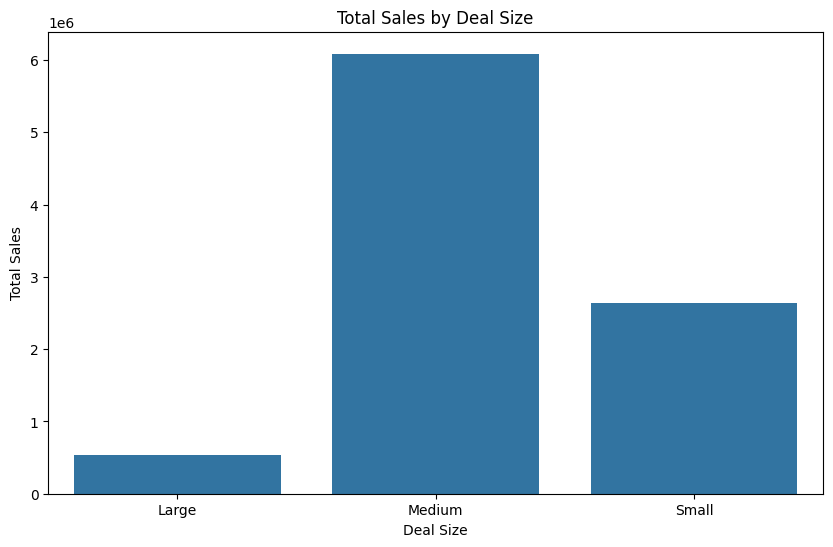

In [85]:
sales_by_dealsize = df.groupby('DEALSIZE')['SALES'].sum()
print(sales_by_dealsize)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_dealsize.index, y=sales_by_dealsize.values)
plt.title('Total Sales by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Total Sales')
plt.show()


##  SUMMARY  
The EDA of the dataset provides key insights into sales performance and trends. It identifies the top-performing countries in terms of sales, allowing businesses to target these markets more effectively. The analysis of deal sizes shows how small, medium, and large deals contribute to total revenue, guiding strategic decisions on pricing and promotions. Additionally, the correlation analysis reveals relationships between various features, which can help in understanding dependencies and selecting important variables for future predictive modeling. Overall, this EDA helps in understanding the data's structure and trends, setting the stage for deeper analysis or forecasting.